In [16]:
import numpy as np
import pandas as pd
data=pd.read_csv('/demand-forecast.csv')
data.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [17]:
data.dtypes

,0
date,object
hour,int64
demand,int64


In [18]:
data['date']=pd.to_datetime(data['date'])
data.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [19]:
data['year']=data['date'].dt.year
data['month']=data['date'].dt.month
data['day']=data['date'].dt.day
data.head()

,date,hour,demand,year,month,day
0,2018-08-18,9,91,2018,8,18
1,2018-08-18,10,21,2018,8,18
2,2018-08-18,13,23,2018,8,18
3,2018-08-18,14,104,2018,8,18
4,2018-08-18,15,81,2018,8,18


In [20]:
data['year']=data['date'].apply(lambda x:x.year)
data['month']=data['date'].apply(lambda x:x.month)
data['day']=data['date'].apply(lambda x:x.day)
data.head()

,date,hour,demand,year,month,day
0,2018-08-18,9,91,2018,8,18
1,2018-08-18,10,21,2018,8,18
2,2018-08-18,13,23,2018,8,18
3,2018-08-18,14,104,2018,8,18
4,2018-08-18,15,81,2018,8,18


In [21]:
data['dayofweek']=data['date'].apply(lambda x:x.dayofweek)
data['quarter']=data['date'].apply(lambda x:x.quarter)
data=data.drop('date',axis=1)
data.head()

,hour,demand,year,month,day,dayofweek,quarter
0,9,91,2018,8,18,5,3
1,10,21,2018,8,18,5,3
2,13,23,2018,8,18,5,3
3,14,104,2018,8,18,5,3
4,15,81,2018,8,18,5,3


In [28]:
def timeofday(n):
  if n in range(1,4):
    return 'late night'
  elif n in range(4,7):
    return 'early morning'
  elif n in range(7,12):
    return 'morning'
  elif n in range(12,15):
    return 'afternoon'
  elif n in range(15,18):
    return 'evening'
  elif n in range(18,24) or n==0:
    return 'Night'
data['time_of_the_day']=data['hour'].apply(lambda x:timeofday(x))
data.head()

,hour,demand,year,month,day,dayofweek,quarter,time_of_the_day
0,9,91,2018,8,18,5,3,morning
1,10,21,2018,8,18,5,3,morning
2,13,23,2018,8,18,5,3,afternoon
3,14,104,2018,8,18,5,3,afternoon
4,15,81,2018,8,18,5,3,evening


In [30]:
def monthtoseason(n):
  if n in [12,1,2]:
    return 'winter'
  elif n in [3,4,5]:
    return 'spring'
  elif n in [6,7,8]:
    return 'summer'
  elif n in [9,10,11]:
    return 'autumn'
data['season']=data['month'].apply(lambda x: monthtoseason(x))
data.head()

,hour,demand,year,month,day,dayofweek,quarter,time_of_the_day,season
0,9,91,2018,8,18,5,3,morning,summer
1,10,21,2018,8,18,5,3,morning,summer
2,13,23,2018,8,18,5,3,afternoon,summer
3,14,104,2018,8,18,5,3,afternoon,summer
4,15,81,2018,8,18,5,3,evening,summer


<ipython-input-32-42a84a9b087e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['season'],y=data['demand'],palette='rainbow')


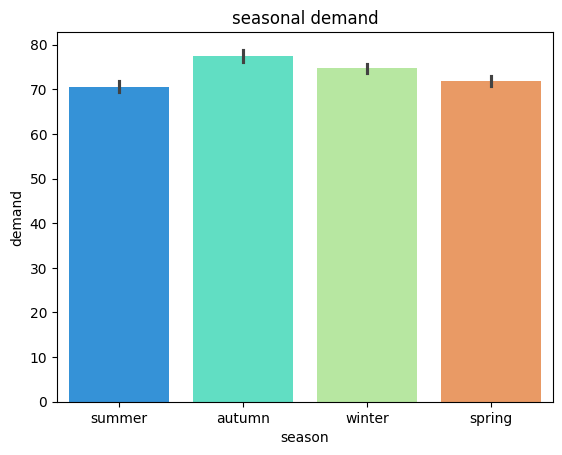

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=data['season'],y=data['demand'],palette='rainbow')
plt.title('seasonal demand')
plt.xlabel('season')
plt.ylabel('demand')
plt.show()